In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pyarrow
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import shap
sns.set_style("white")
plt.rcParams['figure.dpi'] = 300

In [8]:
file_path = r'C:\Users\wziller\Milwaukee Tool\_Global AME\MSOE\CS5610\M6\csc5610base\GroupProjectM6\Award_Batting_HOF_FE.csv'
eng_stats_df = pd.read_feather(file_path)

In [9]:
eng_stats_df.head(20)

,playerID,years_played,total_games,total_at_bats,total_runs,total_hits,total_walks,total_doubles,total_triples,total_home_runs,...,total_GIDP,max_HR,max_hits,max_SB,HOF_status,total_singles,batting_avg,OBP,SLG,OPS
0,aardsda01,9,331.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.000000,0.000000,0.000000,0.000000
1,aaronha01,23,3298.0,12364.0,2174.0,3771.0,1402.0,624.0,98.0,755.0,...,328.0,47.0,223.0,31.0,True,2294.0,0.304998,0.375781,0.435053,0.810834
2,aaronto01,7,437.0,944.0,102.0,216.0,86.0,42.0,6.0,13.0,...,36.0,8.0,77.0,6.0,False,155.0,0.228814,0.293204,0.262712,0.555916
3,aasedo01,13,448.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.000000,0.000000,0.000000,0.000000
4,abadan01,3,15.0,21.0,1.0,2.0,4.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,False,2.0,0.095238,0.240000,0.095238,0.335238
5,abadfe01,6,258.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,False,1.0,0.125000,0.125000,0.125000,0.250000
6,abadijo01,1,12.0,49.0,4.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,1.0,False,11.0,0.224490,0.224490,0.224490,0.448980
7,abbated01,9,855.0,3044.0,355.0,772.0,289.0,99.0,43.0,11.0,...,0.0,3.0,170.0,35.0,False,619.0,0.253614,0.318332,0.274967,0.593299
8,abbeybe01,5,79.0,225.0,21.0,38.0,21.0,3.0,3.0,0.0,...,0.0,0.0,12.0,2.0,False,32.0,0.168889,0.239837,0.182222,0.422060
9,abbeych01,5,451.0,1751.0,307.0,492.0,167.0,67.0,46.0,19.0,...,0.0,8.0,164.0,31.0,False,360.0,0.280982,0.343587,0.328955,0.672542


In [10]:
#X = eng_stats_df[['Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total', 'BattingPost_df_G_avg', 'BattingPost_df_G_total', 'BattingPost_df_AB_avg', 'BattingPost_df_AB_total', 'BattingPost_df_R_avg', 'BattingPost_df_R_total', 'BattingPost_df_H_avg', 'BattingPost_df_H_total', 'BattingPost_df_2B_avg', 'BattingPost_df_2B_total', 'BattingPost_df_3B_avg', 'BattingPost_df_3B_total', 'BattingPost_df_HR_avg', 'BattingPost_df_HR_total', 'BattingPost_df_RBI_avg', 'BattingPost_df_RBI_total', 'BattingPost_df_SB_avg', 'BattingPost_df_SB_total', 'BattingPost_df_CS_avg', 'BattingPost_df_CS_total', 'BattingPost_df_BB_avg', 'BattingPost_df_BB_total', 'BattingPost_df_SO_avg', 'BattingPost_df_SO_total', 'BattingPost_df_IBB_avg', 'BattingPost_df_IBB_total', 'BattingPost_df_HBP_avg', 'BattingPost_df_HBP_total', 'BattingPost_df_SH_avg', 'BattingPost_df_SH_total', 'BattingPost_df_SF_avg', 'BattingPost_df_SF_total', 'BattingPost_df_GIDP_avg', 'BattingPost_df_GIDP_total']]

feature_columns = [
    'total_games', 'total_at_bats', 'total_runs', 'total_hits',
    'total_doubles', 'total_triples', 'total_home_runs', 'total_RBI',
    'total_SB', 'total_CS', 'total_BB', 'total_SO', 'total_IBB',
    'total_HBP', 'total_SH', 'total_SF', 'total_GIDP', 'max_HR',
    'max_hits', 'max_SB'
]

X = eng_stats_df[feature_columns]

y = eng_stats_df['HOF_status']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model_1 = SVC(kernel='poly')
svm_model_1.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model_1.predict(X_test_scaled)

# Display performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\nTotal Accuracy: {accuracy:.2f}%")

# Reset indices for alignment
y_test_reset = y_test.reset_index(drop=True)
y_pred_reset = pd.Series(y_pred, index=y_test_reset.index)

# Identify false positives and false negatives
false_positives = y_test_reset[(y_test_reset == 0) & (y_pred_reset == 1)].index
false_negatives = y_test_reset[(y_test_reset == 1) & (y_pred_reset == 0)].index

# Extract player details for false positives and false negatives
false_positive_players = eng_stats_df.loc[false_positives, ['playerID', 'HOF_status']]
false_negative_players = eng_stats_df.loc[false_negatives, ['playerID', 'HOF_status']]

# Display the results
print("\nFalse Positives:")
print(false_positive_players)

print("\nFalse Negatives:")
print(false_negative_players)


Confusion Matrix:
[[3690    7]
 [  26   22]]

Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00      3697
        True       0.76      0.46      0.57        48

    accuracy                           0.99      3745
   macro avg       0.88      0.73      0.78      3745
weighted avg       0.99      0.99      0.99      3745


Total Accuracy: 99.12%

False Positives:
       playerID  HOF_status
308   anderbr04       False
465   ascheco01       False
953   beamotr01       False
1598   bossha01       False
1839  brickra01       False
2167  burgohi01       False
2750  cecilre01       False

False Negatives:
       playerID  HOF_status
105   adkinhe01       False
194   allenfr01       False
223   allisdo01       False
256   altizda01       False
282   alvorbi01       False
351   andreel01       False
445   arnovmo01       False
463   asbjoca01       False
526   averiea01        True
797   baronst01       False
1125  benned

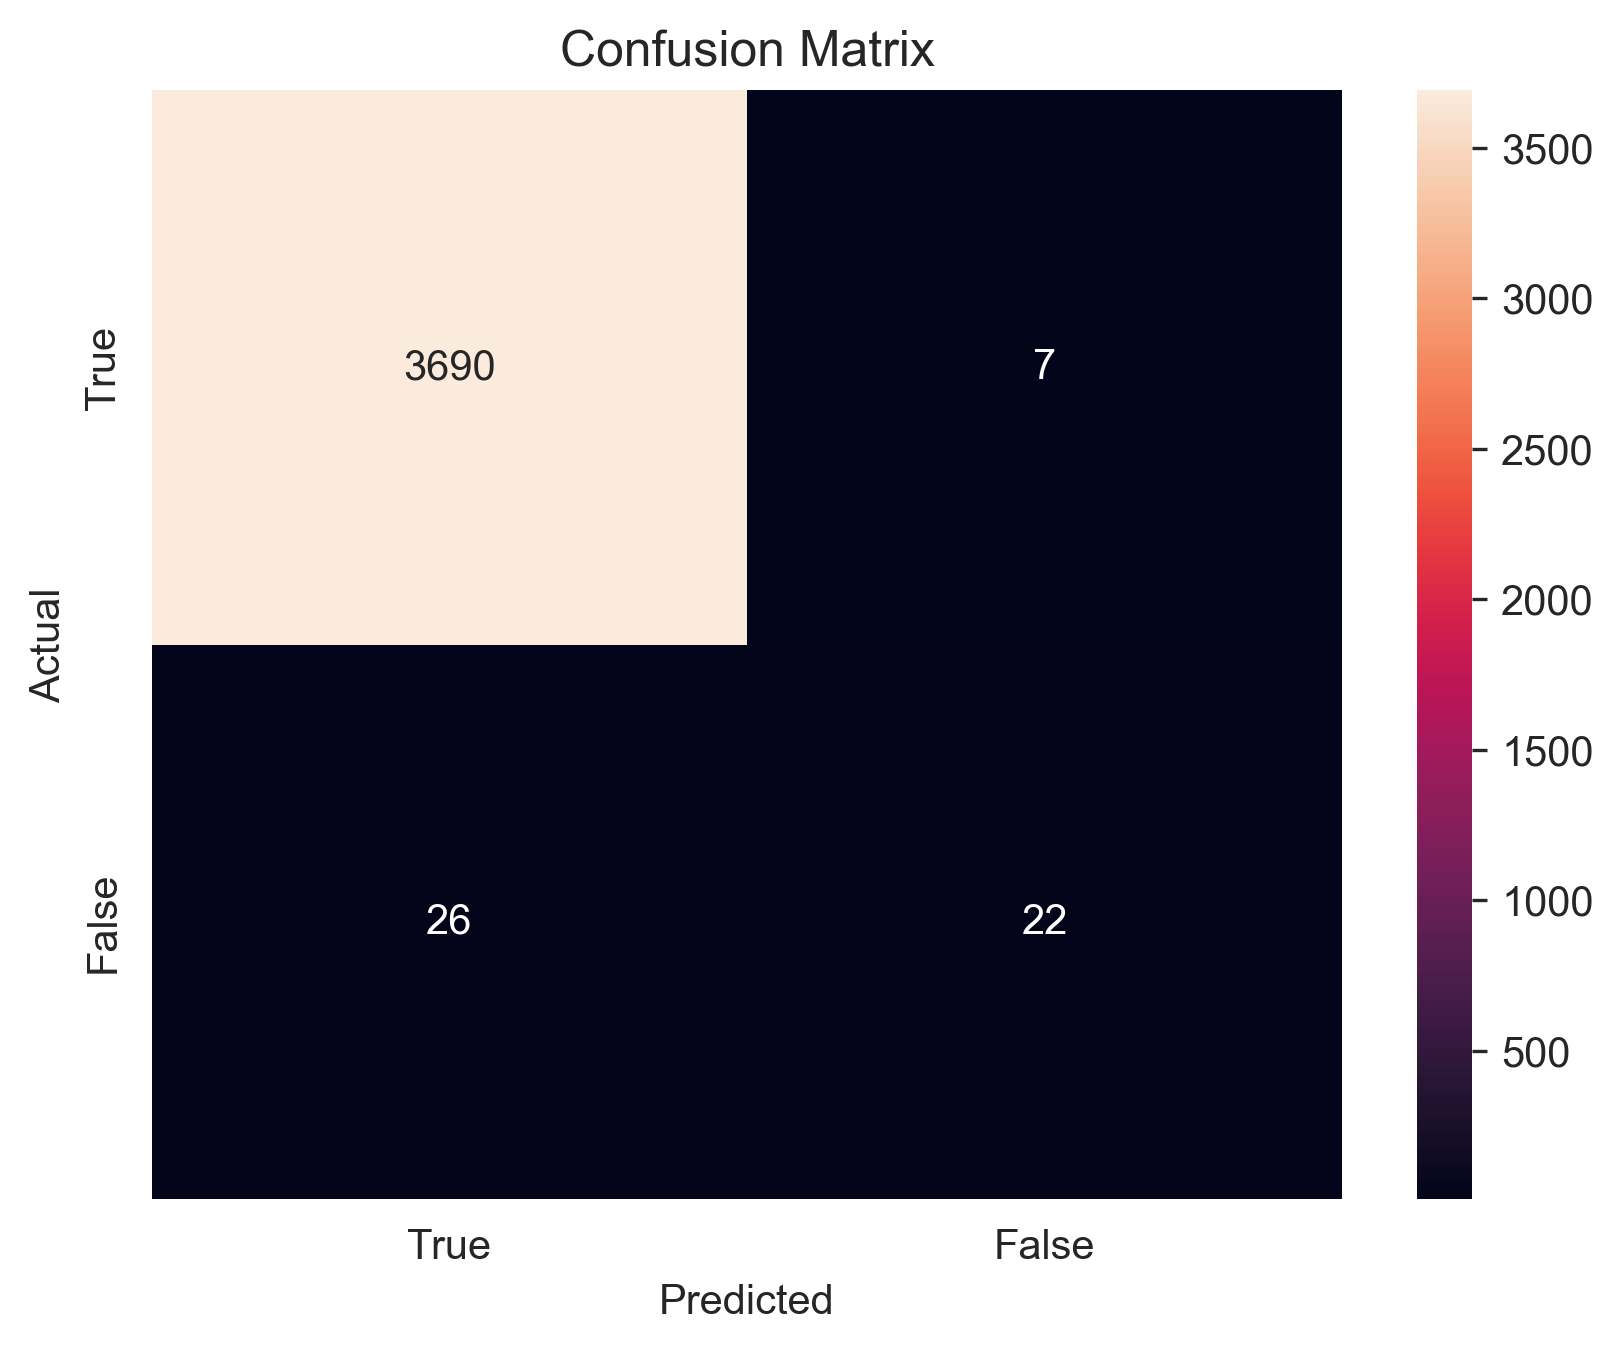

<Figure size 1920x1440 with 0 Axes>

In [11]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.savefig('svm_model_1.png')

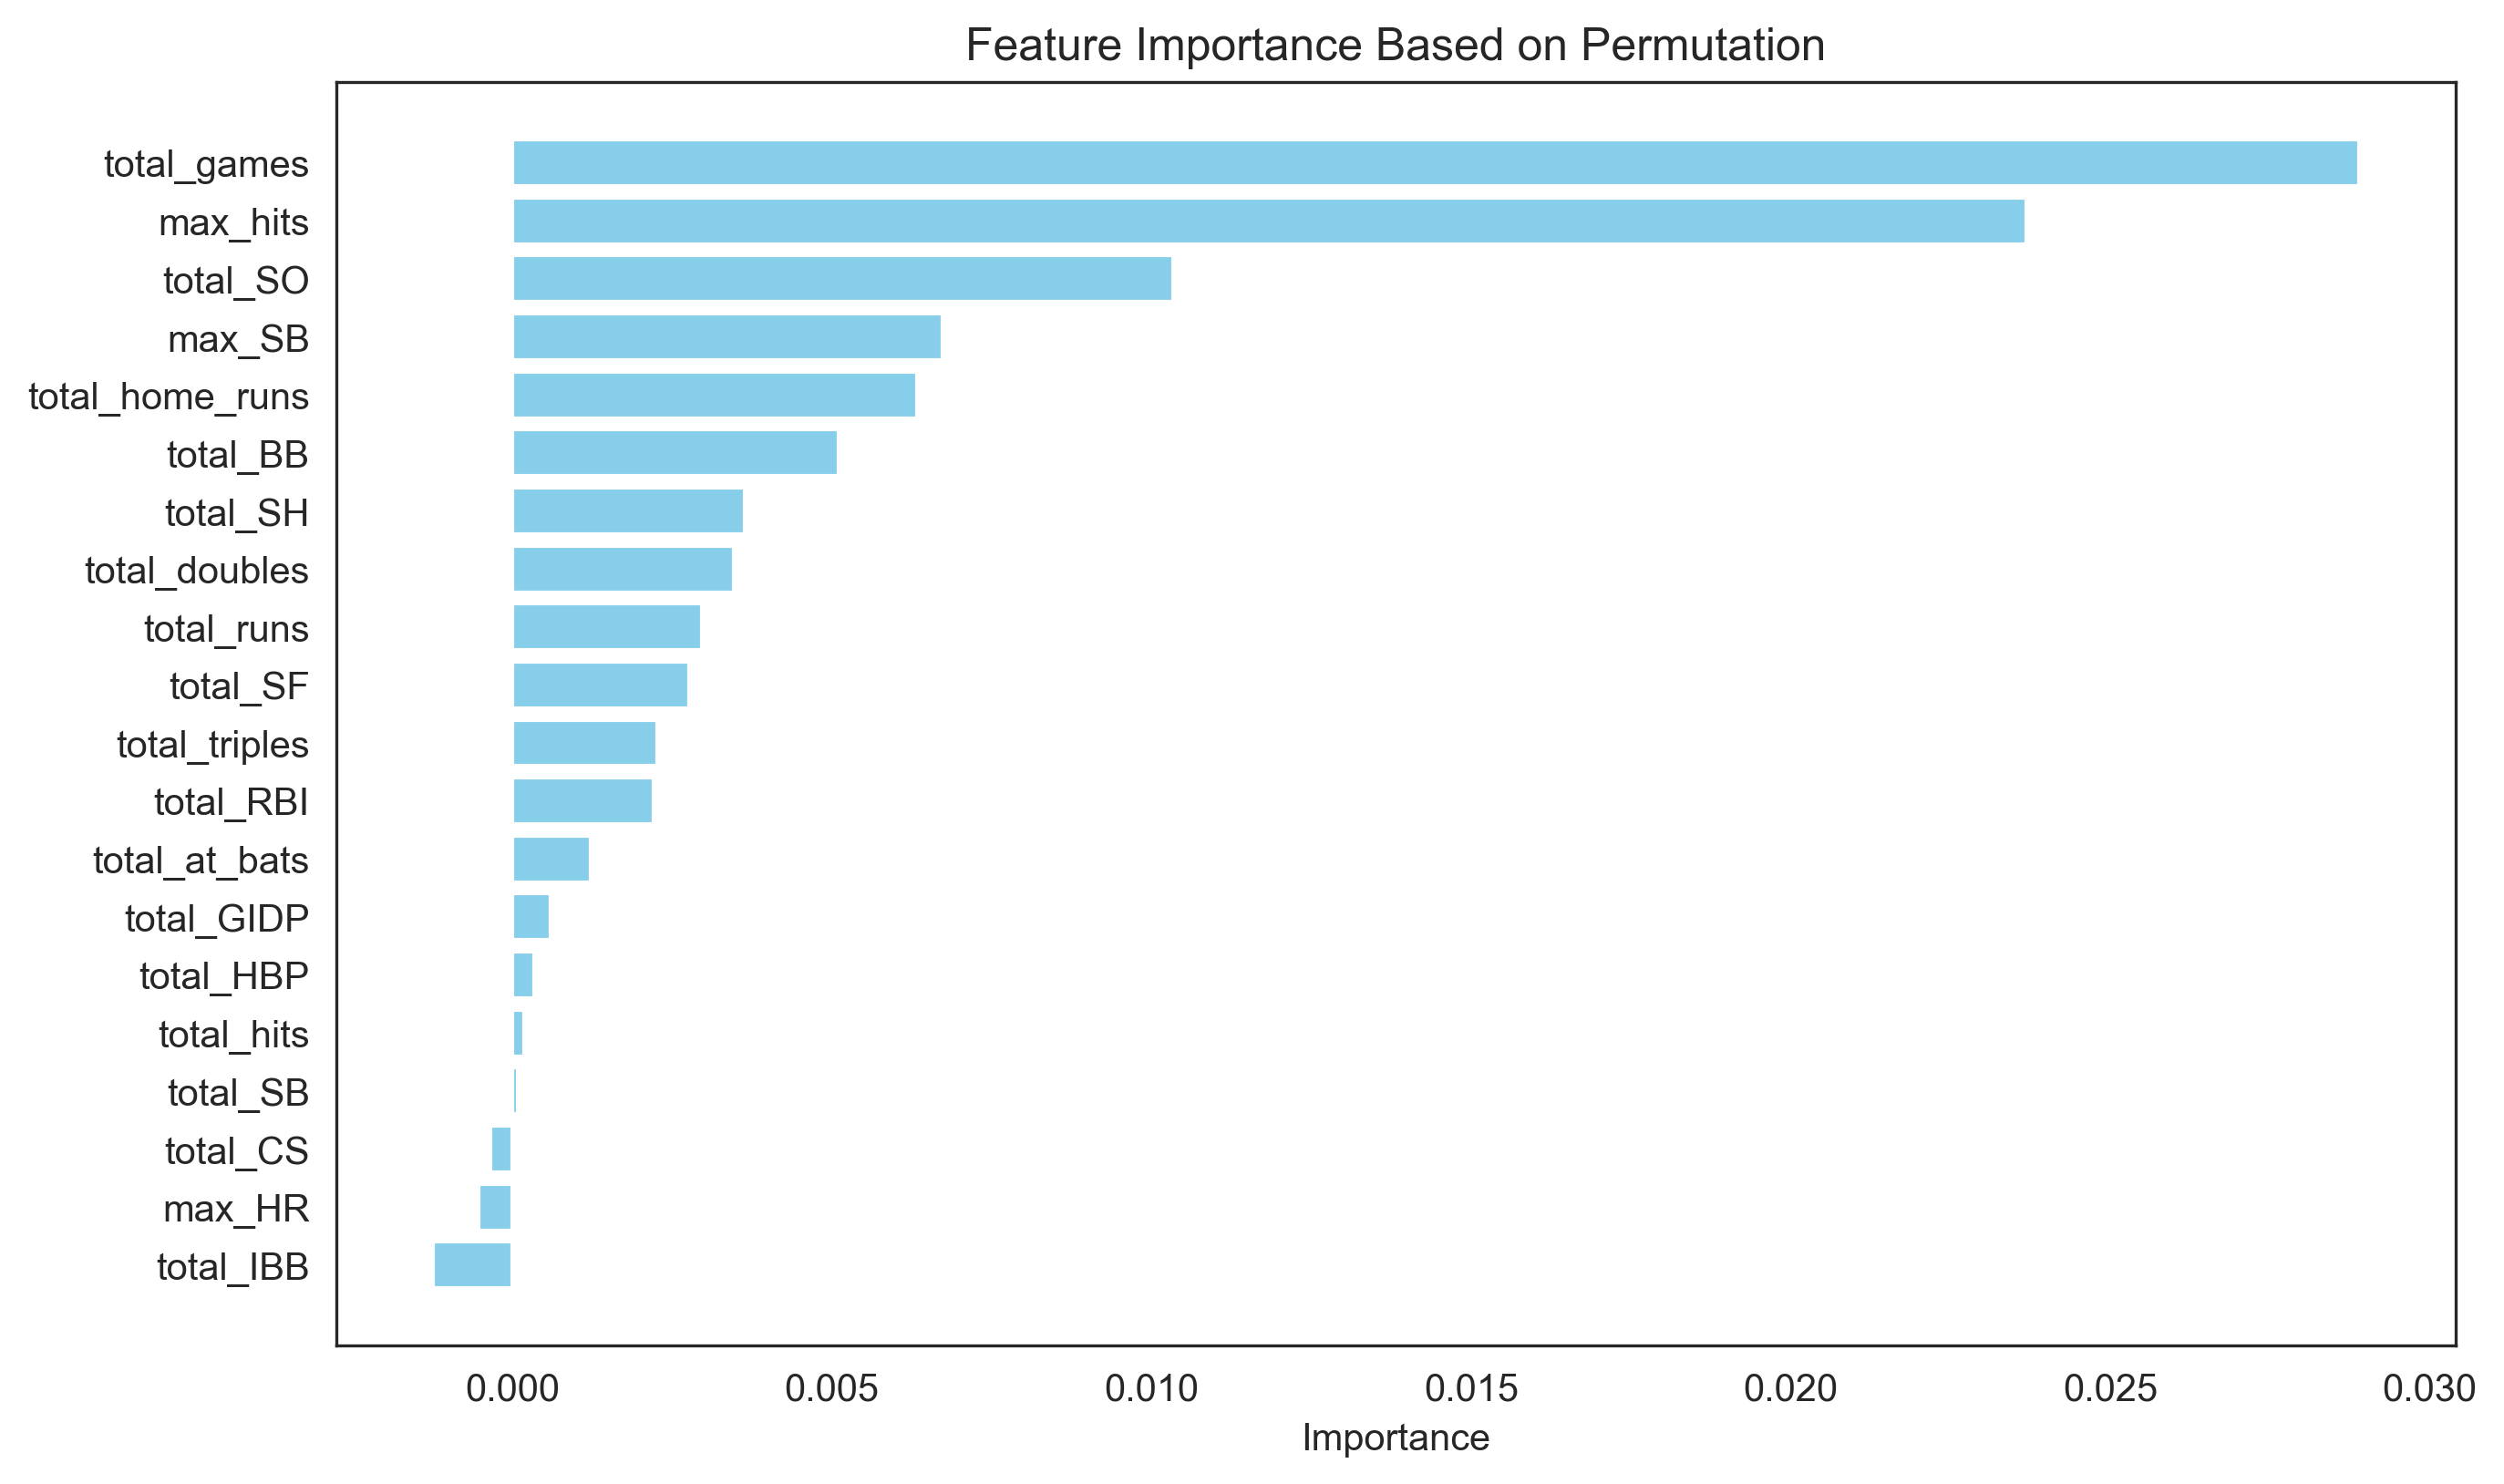

In [12]:

# Calculate feature importance using permutation importance
result = permutation_importance(svm_model_1, X_test_scaled, y_test, n_repeats=30, random_state=42)
importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': result.importances_mean})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance Based on Permutation')
plt.gca().invert_yaxis()
plt.show()